In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data=pd.read_csv(mouse_drug_data_to_load)

clinical_trial_data=pd.read_csv(clinical_trial_data_to_load)
#clinical_trial_data
# Combine the data into a single dataset
merge_table=pd.merge( clinical_trial_data,mouse_drug_data, on="Mouse ID", how="left",sort=False)

# Display the data table for preview
merge_table.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [5]:
## Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
##grouped_table=merge_table.groupby(["Drug","Timepoint"]).mean()
#grouped_table=merge_table.groupby(["Drug","Timepoint"]).mean()
## Convert to DataFrame
#grouped_table.head()
## Preview DataFrame

grouped_table=merge_table.groupby(["Drug","Timepoint"],sort=True)

average_mean = grouped_table["Tumor Volume (mm3)"].mean()
#print(average_mean.values)
#print(average_mean)
average=average_mean.to_frame().reset_index()
average

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#

#data =np.array(average_mean.values)
average["Std_Err"] =average.sem(axis=1)
average.head()

#means = [s.mean() for s in float(data[2])]
#standard_errors = [s.sem() for s in data["Tumor Volume (mm3)"]]
#standard_errors = [[sem(s) for s in data]]
#standard_errors
# Convert to DataFrame
#standard_errors
# Preview DataFrame



,Drug,Timepoint,Tumor Volume (mm3),Std_Err
0,Capomulin,0,45.000000,22.500000
1,Capomulin,5,44.266086,19.633043
2,Capomulin,10,43.084291,16.542145
3,Capomulin,15,42.064317,13.532159
4,Capomulin,20,40.716325,10.358163


In [7]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
pivot_df= average.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


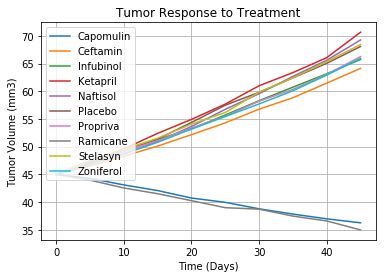

In [8]:
# Generate the Plot (with Error Bars)
import itertools

timepoint=pivot_df.index
#print(timepoint)
labels=pivot_df.keys()
#print(labels)
# Save the Figure
markers=['.',',','o','v','^','<','>','1','2','3']
Tum_Vol = plt.plot(timepoint, pivot_df)
plt.legend(Tum_Vol,labels,loc='upper left')
# Plot the unemployment values for a single country
#country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
#                        color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

# Create a legend for our chart
plt.grid()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 


grouped_table2=merge_table.groupby(["Drug","Timepoint"],sort=True)

average_mean2 = grouped_table2["Metastatic Sites"].mean()
#print(average_mean2.values)
#print(average_mean2)
average2=average_mean2.to_frame().reset_index()
average2

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
average2["Std_Err"] =average2.sem(axis=1)
average2.head()

,Drug,Timepoint,Metastatic Sites,Std_Err
0,Capomulin,0,0.000000,0.000000
1,Capomulin,5,0.160000,2.420000
2,Capomulin,10,0.320000,4.840000
3,Capomulin,15,0.375000,7.312500
4,Capomulin,20,0.652174,9.673913


In [11]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
pivot_df2= average2.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
pivot_df2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')
Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')


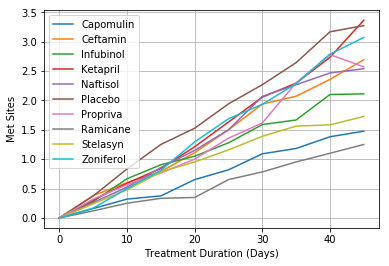

In [14]:

# Generate the Plot (with Error Bars)
timepoint2=pivot_df2.index
print(timepoint)
labels2=pivot_df2.keys()
print(labels)
# Save the Figure
Met_st = plt.plot(timepoint2, pivot_df2  )
#Met_st = plt.errorbar(timepoint2, pivot_df2['Capomulin'].tolist(), yerr=0.4  )
plt.legend(Met_st,labels, loc='upper left')

# Create a legend for our chart
plt.grid()
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met Sites")
# Show the Figure
plt.show()
# Save the Figure



## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame
grouped_table3=merge_table.groupby(["Drug","Timepoint"],sort=True)

average_mean3 = grouped_table3["Metastatic Sites"].count().to_frame().reset_index()
average_max3 = average_mean3.groupby("Drug").max()
#print(average_mean3.head())

#average_max3
#print(average_max3.head())
average3=pd.merge(average_mean3,average_max3,on="Drug",how="left",sort=True)


average3["Percent_survival"]=average3["Metastatic Sites_x"]/average3["Metastatic Sites_y"]*100
#average3=.to_frame().reset_index()
#average3["percent"]=average_max3["Metastatic Sites"]
average3

,Drug,Timepoint_x,Metastatic Sites_x,Timepoint_y,Metastatic Sites_y,Percent_survival
0,Capomulin,0,25,45,25,100.000000
1,Capomulin,5,25,45,25,100.000000
2,Capomulin,10,25,45,25,100.000000
3,Capomulin,15,24,45,25,96.000000
4,Capomulin,20,23,45,25,92.000000
5,Capomulin,25,22,45,25,88.000000
6,Capomulin,30,22,45,25,88.000000
7,Capomulin,35,22,45,25,88.000000
8,Capomulin,40,21,45,25,84.000000
9,Capomulin,45,21,45,25,84.000000


In [16]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
pivot_df3= average3.pivot(index='Timepoint_x', columns='Drug', values='Metastatic Sites_x')

pivot_df3

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint_x,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


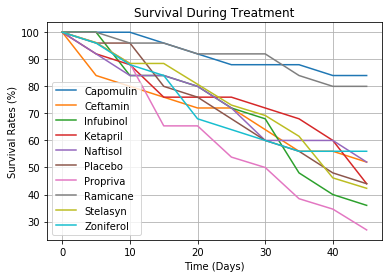

In [17]:

pivot_df4= average3.pivot(index='Timepoint_x', columns='Drug', values='Percent_survival')


# Generate the Plot (with Error Bars)
timepoint3=pivot_df4.index
#print(timepoint)
labels3=pivot_df4.keys()
#print(labels)
# Save the Figure
Met_st = plt.plot(timepoint3, pivot_df4  )
plt.legend(Met_st,labels, loc='bottom left')

# Create a legend for our chart
plt.grid()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rates (%)")
# Show the Figure
plt.show()
# Save the Figure


## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug

# Display the data to confirm
grouped_table3=merge_table.groupby(["Drug","Timepoint"],sort=True).mean().reset_index()
#]'\]\print(grouped_table3)


grouped_table_init = grouped_table3.loc[grouped_table3["Timepoint"] == 0]
#print(grouped_table_init)


grouped_table_last = grouped_table3.loc[grouped_table3["Timepoint"] == 45]
#print(grouped_table_last)


chg1=pd.merge(grouped_table_init,grouped_table_last,on="Drug",how="left",sort=True)

chg1["Percent_Tum_Vol_chg"]=(chg1["Tumor Volume (mm3)_y"]-chg1["Tumor Volume (mm3)_x"])/chg1["Tumor Volume (mm3)_x"]*100
#chg1["Percent_MEt_St_chg"]=(chg1["Metastatic Sites_y"]-chg1["Metastatic Sites_x"])/chg1["Metastatic Sites_x"]*100

chg1
#average_mean3 = grouped_table3["Metastatic Sites"].count().to_frame().reset_index()
#average_max3 = average_mean3.groupby("Drug").max()
#print(average_mean3.head())

#average_max3
#print(average_max3.head())
#average3=pd.merge(average_mean3,average_max3,on="Drug",how="left",sort=True)


#average3["Percent_survival"]=average3["Metastatic Sites_x"]/average3["Metastatic Sites_y"]*100
#average3=.to_frame().reset_index()
#average3["percent"]=average_max3["Metastatic Sites"]
#average3

,Drug,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y,Percent_Tum_Vol_chg
0,Capomulin,0,45.0,0.0,45,36.236114,1.476190,-19.475303
1,Ceftamin,0,45.0,0.0,45,64.132421,2.692308,42.516492
2,Infubinol,0,45.0,0.0,45,65.755562,2.111111,46.123472
3,Ketapril,0,45.0,0.0,45,70.662958,3.363636,57.028795
4,Naftisol,0,45.0,0.0,45,69.265506,2.538462,53.923347
5,Placebo,0,45.0,0.0,45,68.084082,3.272727,51.297960
6,Propriva,0,45.0,0.0,45,66.258529,2.571429,47.241175
7,Ramicane,0,45.0,0.0,45,34.955595,1.250000,-22.320900
8,Stelasyn,0,45.0,0.0,45,68.438310,1.727273,52.085134
9,Zoniferol,0,45.0,0.0,45,65.960888,3.071429,46.579751


['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
[0 1 2 3 4 5 6 7 8 9]


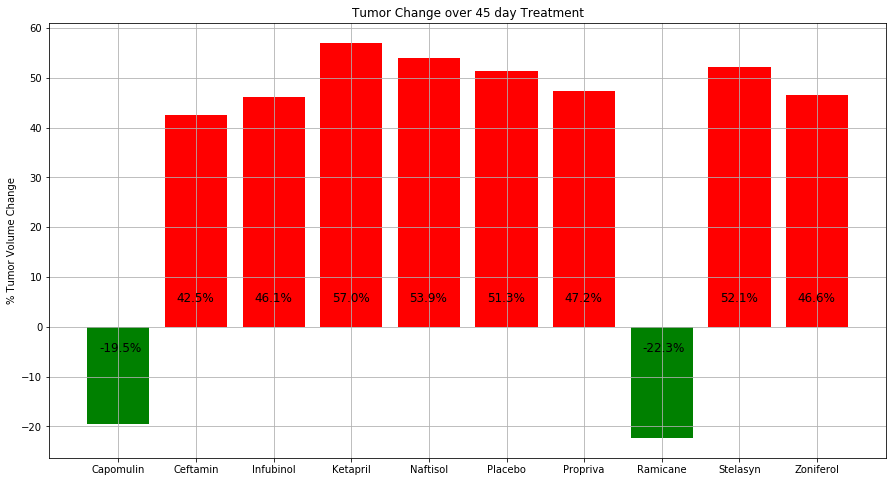

In [118]:
from matplotlib.pyplot import figure

# Generate the Plot (with Error Bars)

def pltcolor(lst):
    cols=[]
    for l in lst:
        if l<0:
            cols.append('green')
#        elif l=='B':
#            cols.append('blue')
        else:
            cols.append('red')
    return cols


cols=pltcolor(chg1["Percent_Tum_Vol_chg"])


labels4=chg1["Drug"].tolist()
print(labels4)
x_pos = np.arange(len(labels4))

print(x_pos)
# Save the Figure


plt.figure(figsize=(15,8))
Met_st = plt.bar(x_pos, chg1["Percent_Tum_Vol_chg"],align='center',color=cols  )
#plt.legend(Met_st,labels, loc='bottom left')


for i, v in enumerate(y_pos):
    plt.text(x_pos[i]-0.25, 
               np.sign(chg1["Percent_Tum_Vol_chg"][i])*5, 
              str(round(chg1["Percent_Tum_Vol_chg"][i],1)) + "%", 
              fontsize=12, 
#              color=label_color_list[i]
            )


plt.xticks(x_pos, labels4)
#plt.text(y_pos, chg1["Percent_Tum_Vol_chg"], " "+str(y_pos), color='blue', va='center', fontweight='bold')

#for i, v in enumerate(y_pos):
#    plt.text(chg1["Percent_Tum_Vol_chg"][i] , v + 0.01, str(v))
    
# Create a legend for our chart
plt.grid()
plt.title("Tumor Change over 45 day Treatment")


plt.ylabel("% Tumor Volume Change")
# Show the Figure
plt.show()

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


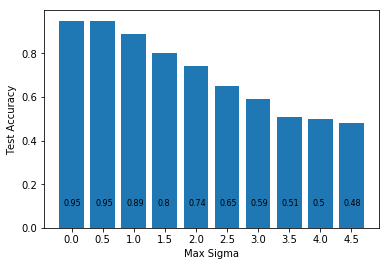

In [101]:
x=[i for i in range(1,11)]
y=[0.95,
0.95,
0.89,
0.8,
0.74,
0.65,
0.59,
0.51,
0.5,
0.48]

plt.bar(x, height= y)
xlocs, xlabs = plt.xticks()
xlocs=[i+1 for i in range(0,10)]
print(xlocs)
xlabs=[i/2 for i in range(0,10)]
plt.xlabel('Max Sigma')
plt.ylabel('Test Accuracy')
plt.xticks(xlocs, xlabs)

for i, v in enumerate(y):
    plt.text(xlocs[i]-.25, 
              0.1, 
              str(y[i]), 
              fontsize=8, 
              )

plt.show()